>* **Name: HEMAA CHANDHAN**
>* **USN : 20BTRCD039**
>* **House Price Prediction** 

In [1]:
dff = pd.read_csv("train (1).csv")
test = pd.read_csv('test.csv')
df = pd.concat([dff,test])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [106]:
dff.shape

(1460, 81)

In [2]:
!pip install pandas-profiling

In [2]:
import sweetviz as sv
report = sv.analyze(dff)

                                             |                                             | [  0%]   00:00 ->…

In [3]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
df.set_index('Id',inplace=True)

In [6]:
df.SalePrice.fillna(0,inplace=True)

In [7]:
dff.shape

(1460, 81)

In [8]:
type(dff)

pandas.core.frame.DataFrame

In [9]:
df.shape

(2919, 80)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [11]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [12]:
df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40, 150], dtype=int64)

In [13]:
df.MSSubClass.nunique()

16

In [14]:
cols = df.columns

In [15]:
Features_non_null = []
Features_null = []
for i in cols:
    if df[i].isnull().sum() == 0:
        Features_non_null.append(i)
    else:
        Features_null.append((i,df[i].isnull().sum()))

In [16]:
Features_non_null

['MSSubClass',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleCondition',
 'SalePrice']

In [17]:
Features_null

[('MSZoning', 4),
 ('LotFrontage', 486),
 ('Alley', 2721),
 ('Utilities', 2),
 ('Exterior1st', 1),
 ('Exterior2nd', 1),
 ('MasVnrType', 24),
 ('MasVnrArea', 23),
 ('BsmtQual', 81),
 ('BsmtCond', 82),
 ('BsmtExposure', 82),
 ('BsmtFinType1', 79),
 ('BsmtFinSF1', 1),
 ('BsmtFinType2', 80),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('Electrical', 1),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('KitchenQual', 1),
 ('Functional', 2),
 ('FireplaceQu', 1420),
 ('GarageType', 157),
 ('GarageYrBlt', 159),
 ('GarageFinish', 159),
 ('GarageCars', 1),
 ('GarageArea', 1),
 ('GarageQual', 159),
 ('GarageCond', 159),
 ('PoolQC', 2909),
 ('Fence', 2348),
 ('MiscFeature', 2814),
 ('SaleType', 1)]

In [18]:
for i in Features_null:
    if i[1]>300:
        df.drop(i[0],axis= 1,inplace=True)
        Features_null.pop(Features_null.index(i))

In [19]:
df

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,6,2006,WD,Normal,0.0
2916,160,RM,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,4,2006,WD,Abnorml,0.0
2917,20,RL,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2006,WD,Abnorml,0.0


## MSSubClass:
MSSubClass: Identifies the type of dwelling involved in the sale.(dwelling= Ahouse or place of residence)	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

There are no null values in this Attribute and we cannot check for normal distribution of data as they are of type nominal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Types of Houses in Sale')

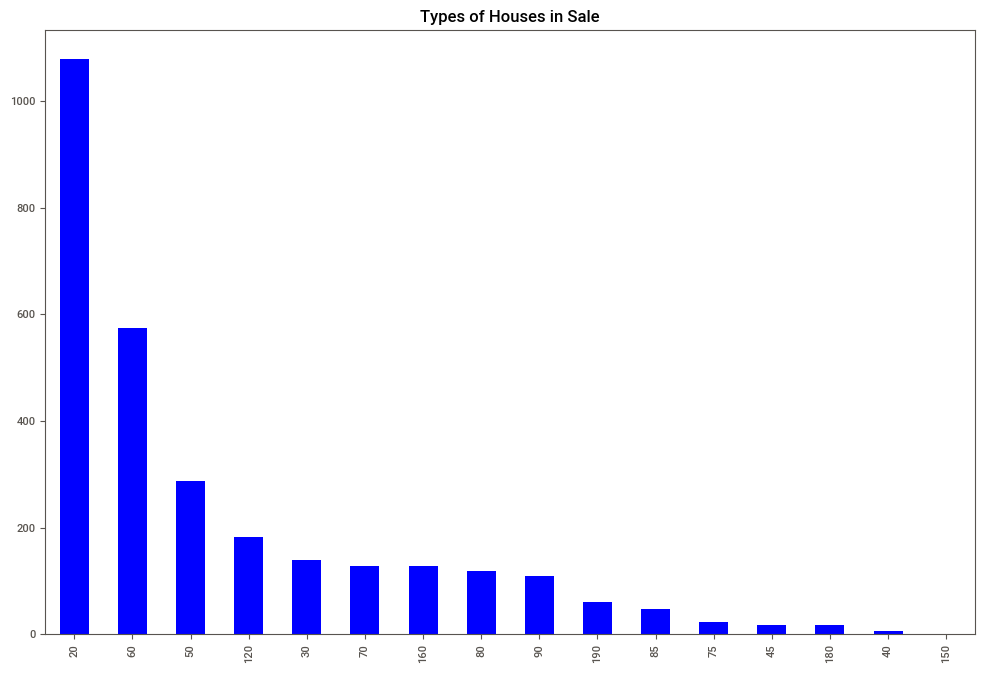

In [20]:
plt.figure(figsize=(12,8))
df.MSSubClass.value_counts().plot(kind="bar",color='b')
plt.title("Types of Houses in Sale")

**Higest no. of flats/houses can be seen on flat type 20(1-STORY 1946 & NEWER ALL STYLES)**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Cumulative sum of Prices based on the type of residence')

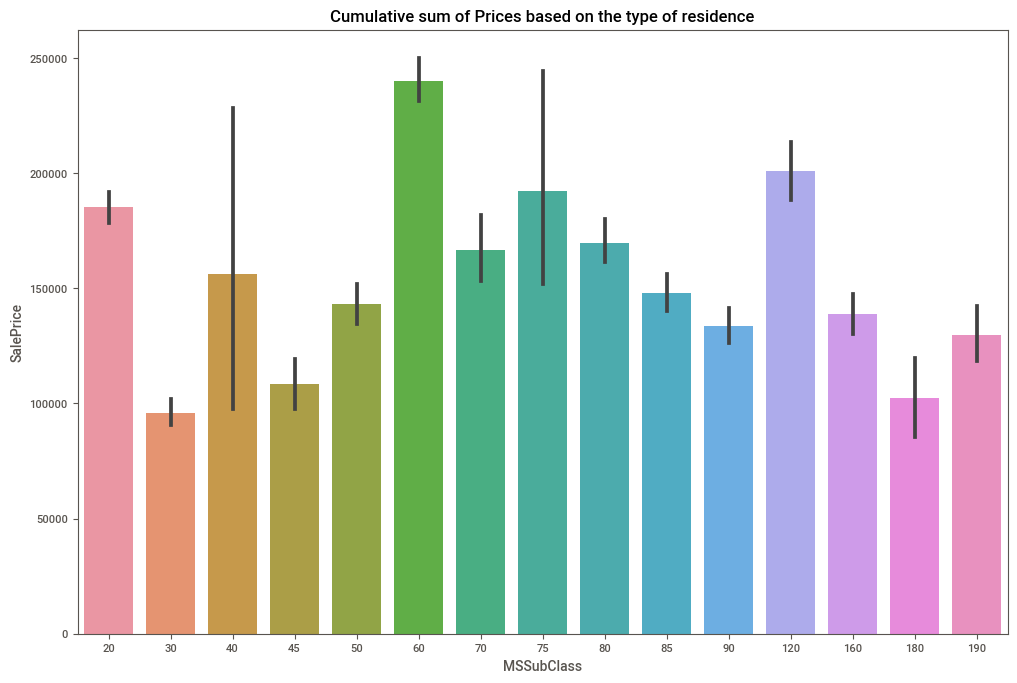

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(df["MSSubClass"][:1460],df["SalePrice"][:1460])
plt.title("Cumulative sum of Prices based on the type of residence")

In the previous graph the highest no. of plots are of type 20 but from this graph we can understand that they are not expensive when compared to other flats like 120,160,180,190

**From this, it is clear the that higher the flat number type higher is the cost of the flat**

In [22]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enc

## 'MSZoning':

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	

In [23]:
df.MSZoning.isnull().sum()
#There are Four Null values in the Attribute MSZoning

4

In [24]:
#Find the null rows in the Data Set
df[df["MSZoning"].isnull() == True]

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1916,30,NaN,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,...,0,0,0,NaN,0,3,2009,ConLD,Normal,0.0
2217,20,NaN,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,...,0,0,0,NaN,0,2,2008,WD,Abnorml,0.0
2251,70,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,...,0,0,0,NaN,0,1,2008,WD,Normal,0.0
2905,20,NaN,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,5,2006,WD,Normal,0.0


In [25]:
dff.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [26]:
df[df["MSSubClass"]==70]#Here in most of the cases it is RM if MSSubclass is 30
#RL if MSSubClass is 20 or 70


,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000.0
31,70,C (all),8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,MnPrv,0,7,2008,WD,Normal,40000.0
64,70,RM,10300,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,GdPrv,0,4,2010,WD,Normal,140000.0
115,70,RL,7259,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,...,0,0,0,MnPrv,0,7,2007,WD,Normal,259500.0
182,70,RL,7588,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,7,2006,WD,Normal,200100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,70,RL,7000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,MnPrv,0,5,2006,WD,Normal,0.0
2877,70,RL,4899,Pave,NaN,Reg,HLS,AllPub,Corner,Gtl,...,0,0,0,NaN,0,6,2006,WD,Normal,0.0
2878,70,RL,9399,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2006,WD,Abnorml,0.0


In [27]:
df.MSZoning.fillna("RL",inplace=True)

In [28]:
# df[df["MSZoning"].isnull() == True]  Hence no. of null rows in MSZoning are 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Cumulative price of houses based on their Zones')

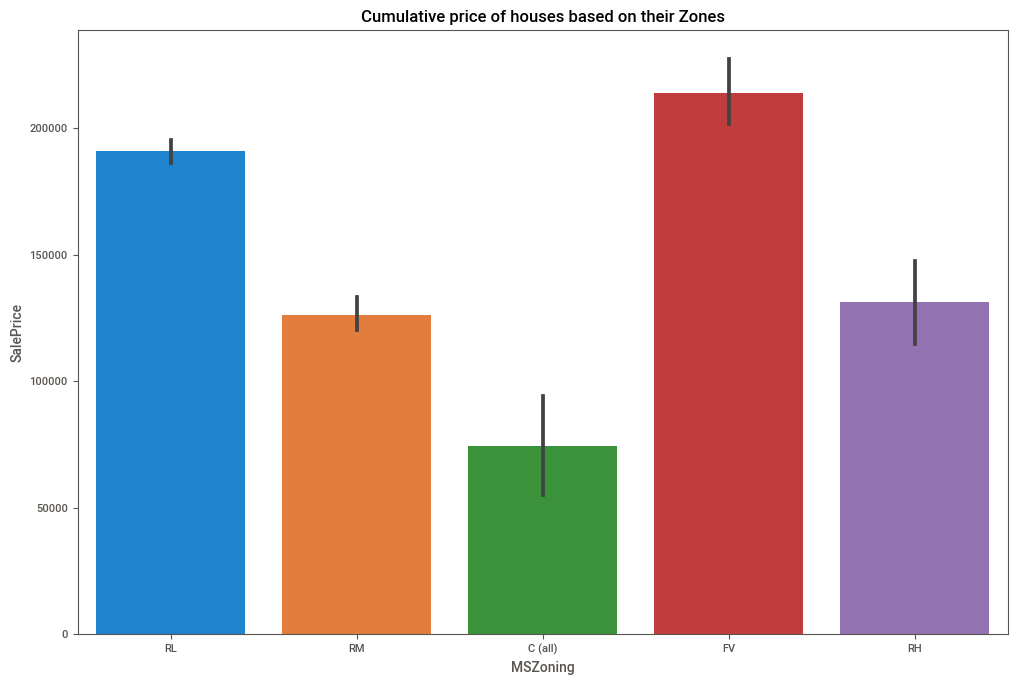

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(dff["MSZoning"],dff["SalePrice"])
plt.title("Cumulative price of houses based on their Zones")

**From the barplot above, it is clear that houses in FV( Floating Village Residential ) are expensive when compared with other houses situated in other areas , despite having only 139 houses in FV it's showing an amount of over 21Crores which is the highest**

In [30]:
from sklearn.preprocessing import OrdinalEncoder
df[["MSZoning"]]=OrdinalEncoder().fit_transform(df[["MSZoning"]])

In [31]:
df.MSZoning.value_counts()

3.0    2269
4.0     460
1.0     139
2.0      26
0.0      25
Name: MSZoning, dtype: int64

In [32]:
df

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500.0
2,20,3.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500.0
3,60,3.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500.0
4,70,3.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,3.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,4.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,6,2006,WD,Normal,0.0
2916,160,4.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,4,2006,WD,Abnorml,0.0
2917,20,3.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2006,WD,Abnorml,0.0


## LotArea: 
**Lot size in square feet**

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

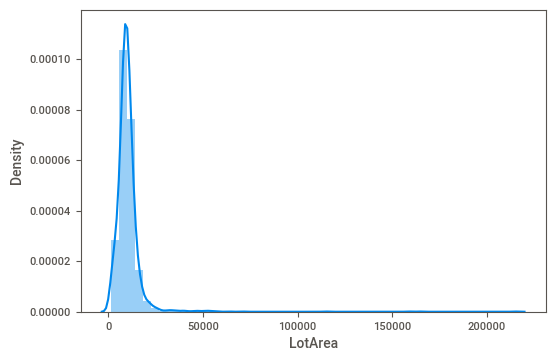

In [33]:
sns.distplot(df['LotArea'])

In [34]:
df.LotArea.describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

In [35]:
count = 0
for i in df.LotArea:
    if i>25000:
        count += 1
        
print(count)

48


<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

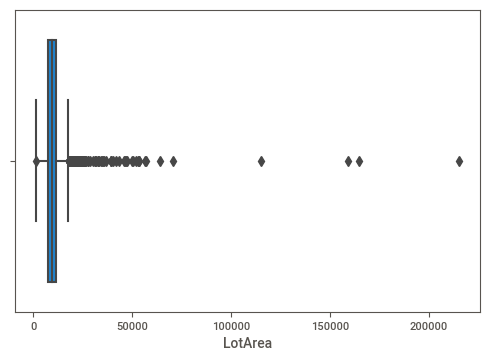

In [36]:
sns.boxplot(df["LotArea"])

In [37]:
upper_limit = df.LotArea.quantile(.99)

In [38]:
df.drop(df.loc[df['LotArea']>upper_limit].index,inplace = True)

In [39]:
# df.loc[df['LotArea']>upper_limit].index

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

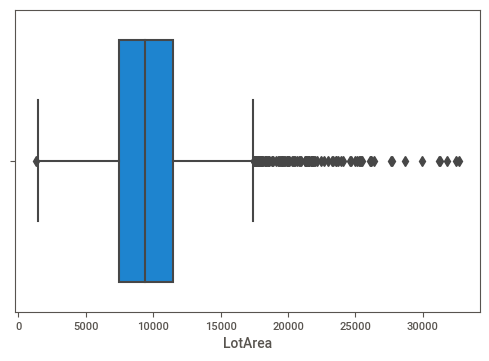

In [40]:
sns.boxplot(df["LotArea"])

___There are some outliers, but that might be important show the distingusing between expensive and affordable residences___

In [41]:
df[['LotArea',"SalePrice"]].corr()
#There is a considerable correlation between Lot Area And Sale Price

,LotArea,SalePrice
LotArea,1.000000,0.159583
SalePrice,0.159583,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'LotArea  Vs  SalePrice')

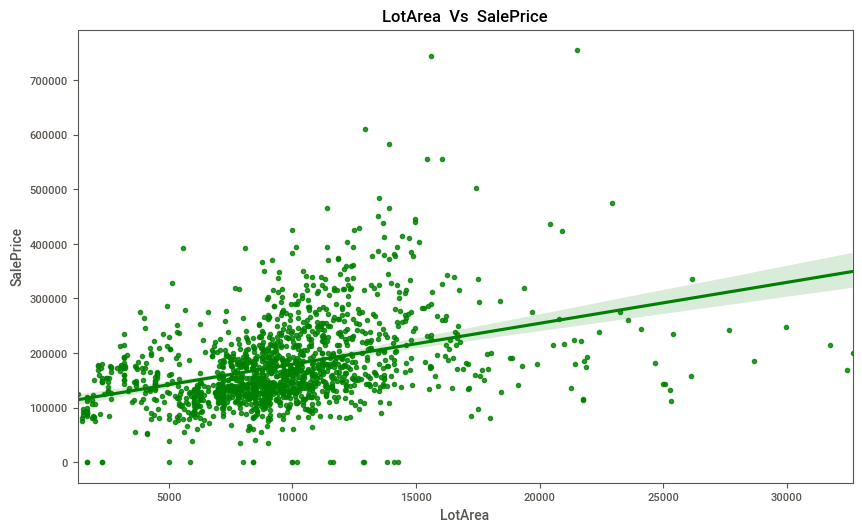

In [42]:
plt.figure(figsize=(10,6))
sns.regplot(df["LotArea"][:1460],df["SalePrice"][:1460],color = "green")
plt.title("LotArea  Vs  SalePrice")

**The scatter plot showing strong positive relation between LotArea and Saleprice, Which indicates that if there is an increase in size of lot area there are high chances there is an increase in Price of the residence**

## Street:

Street: Type of road access to property

       Grvl	---->   Gravel	
       Pave  ---->	Paved

In [43]:
df.Street.info()
#It's a categorical variable with Gravel and Peaved paths

<class 'pandas.core.series.Series'>
Int64Index: 2889 entries, 1 to 2919
Series name: Street
Non-Null Count  Dtype 
--------------  ----- 
2889 non-null   object
dtypes: object(1)
memory usage: 45.1+ KB


In [44]:
df[["Street"]] = OrdinalEncoder().fit_transform(df[["Street"]])

1  ---->>> "Paved path"

0 ----->>> "Gravel Path"

In [45]:
df["Street"].value_counts()
#Since there are only 10 rows which are gravel it is biased so we can simply remove this attribute

1.0    2879
0.0      10
Name: Street, dtype: int64

In [46]:
df[["Street","SalePrice"]].corr()
#hardly any Correlation

,Street,SalePrice
Street,1.000000,0.029692
SalePrice,0.029692,1.000000


In [47]:
df.drop("Street",axis=1,inplace = True)

## LotShape:

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [48]:
from sklearn.preprocessing import OneHotEncoder
df.LotShape.value_counts()

Reg    1856
IR1     950
IR2      70
IR3      13
Name: LotShape, dtype: int64

<IPython.core.display.Javascript object>

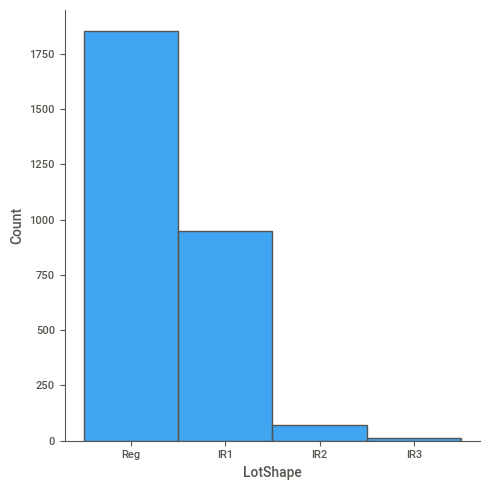

In [49]:
sns.displot(df.LotShape)

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotShape', ylabel='count'>

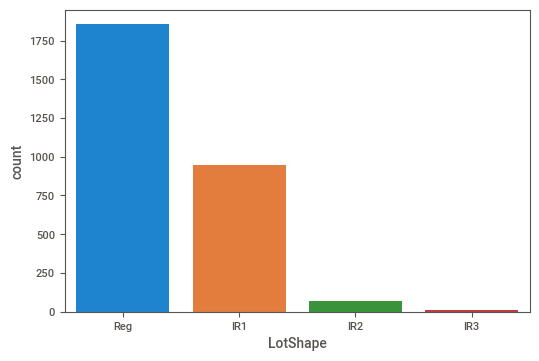

In [50]:
sns.countplot(df.LotShape)

**The count of Regular and slightly irregular houses are occupying the 95% of data when compared with other lotshapes**

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

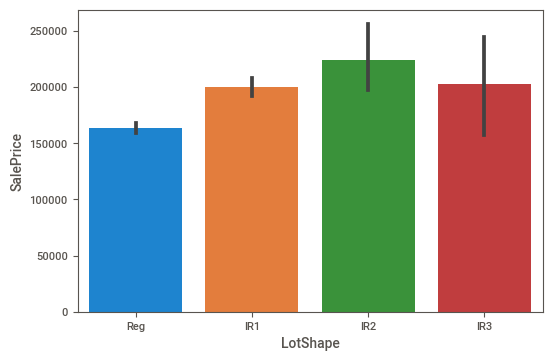

In [51]:
sns.barplot(df["LotShape"][:1460],df["SalePrice"][:1460])

In [52]:
pd.crosstab(df["LotShape"][:1460],df["SalePrice"].sum())

<IPython.core.display.Javascript object>

col_0,258728046.0
LotShape,
IR1,486
IR2,35
IR3,8
Reg,931


<AxesSubplot:xlabel='LotShape'>

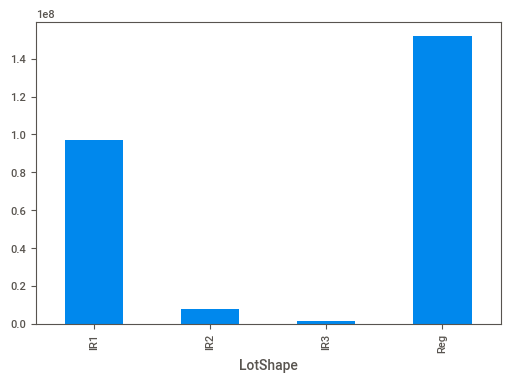

In [53]:
df.SalePrice.groupby(df["LotShape"]).sum().plot(kind="bar")

In [54]:

#IR1-97202006.0
#Reg-152066507.0
#IR2-7834168.0
#IR3 - 1625365.0

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='SalePrice', ylabel='LotShape'>

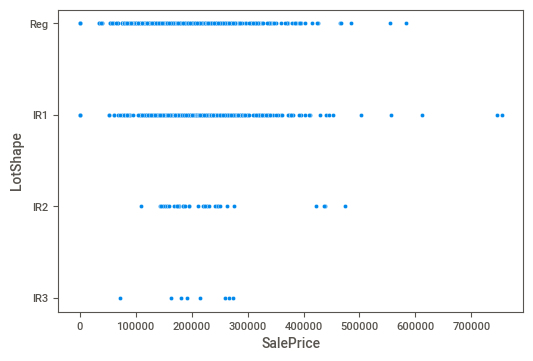

In [55]:
sns.scatterplot(y= df["LotShape"][:1460],x=df["SalePrice"][:1460])

In [56]:
dis = (df.SalePrice.loc[df["LotShape"]=="IR3"][:1460])

In [57]:
dis.sum()

1625365.0

In [58]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df["LotShape"] = oe.fit_transform(df[["LotShape"]])

In [59]:
df.LotShape.value_counts()

3.0    1856
0.0     950
1.0      70
2.0      13
Name: LotShape, dtype: int64

In [60]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

# LandCounter

In [61]:
cols = df.columns

In [62]:
cols

  

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

In [63]:
Features_null.pop(1)

('Alley', 2721)

In [64]:
df.shape

(2889, 75)

In [65]:
df.drop('Fence',inplace=True,axis=1)

In [66]:
df.drop('Alley',inplace=True,axis=1)

In [67]:
df.fillna(method = "ffill",inplace=True)

In [68]:
df.isnull().sum().sum()

0

In [69]:
c=0
for i in df.dtypes:
    if i == 'object':
        c+=1
        
print(c)
# THere are 35 attributes which are object type

35


**Insight Using Sweet Viz Library Important Categorical Features that Contribute selling price of the House**

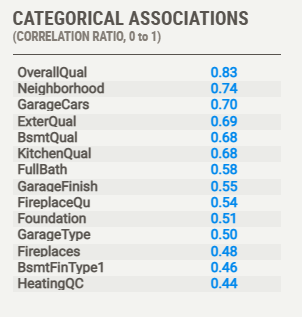

In [73]:
cat_assosiations = ['OverallQual','Neighborhood','GarageCars','FullBath','GarageFinish',
                    'Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']

* 'ExterQual','BsmtQual','KitchenQual' These Features can be taken under OverallQual

In [76]:
enc = []
for i in cat_assosiations:
    if df[i].dtype == 'object':
        enc.append(i)

In [153]:
enc

['Neighborhood',
 'GarageFinish',
 'Foundation',
 'GarageType',
 'BsmtFinType1',
 'HeatingQC']

In [152]:
for i in enc:
    dff[[i]]= OrdinalEncoder().fit_transform(dff[[i]])

**Numerical Assosiations with Selling Price**
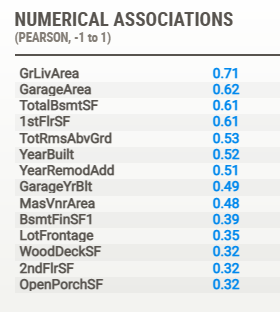

In [91]:
num_associations = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt',
                   'MasVnrArea','WoodDeckSF','2ndFlrSF','OpenPorchSF']

In [86]:
#Dobule Check
for i in num_associations:
    print(df[i].dtype)

int64
float64
float64
int64
int64
int64
int64
float64
float64
int64
int64
int64


In [87]:
len(num_associations)+len(cat_assosiations)

22

#### There are 22 features that more mostly Contributing to the Selling Price of the Houses

In [88]:
num_associations.append(cat_assosiations)

In [128]:
X = num_associations + cat_assosiations

In [177]:
trainx = dff[X]

In [178]:
trainx.isnull().sum()

GrLivArea       0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
OverallQual     0
Neighborhood    0
GarageCars      0
FullBath        0
GarageFinish    0
Foundation      0
GarageType      0
Fireplaces      0
BsmtFinType1    0
HeatingQC       0
dtype: int64

In [145]:
dff.fillna(method='ffill',inplace = True)

In [156]:
trainx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1460 non-null   int64  
 1   GarageArea    1460 non-null   int64  
 2   TotalBsmtSF   1460 non-null   int64  
 3   1stFlrSF      1460 non-null   int64  
 4   TotRmsAbvGrd  1460 non-null   int64  
 5   YearBuilt     1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   GarageYrBlt   1460 non-null   float64
 8   MasVnrArea    1460 non-null   float64
 9   WoodDeckSF    1460 non-null   int64  
 10  2ndFlrSF      1460 non-null   int64  
 11  OpenPorchSF   1460 non-null   int64  
 12  OverallQual   1460 non-null   int64  
 13  Neighborhood  1460 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  GarageFinish  1460 non-null   float64
 17  Foundation    1460 non-null   float64
 18  GarageType    1460 non-null 

In [158]:
dff.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [179]:
x = trainx

In [180]:
y = dff.SalePrice

In [164]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1460 non-null   int64  
 1   GarageArea    1460 non-null   int64  
 2   TotalBsmtSF   1460 non-null   int64  
 3   1stFlrSF      1460 non-null   int64  
 4   TotRmsAbvGrd  1460 non-null   int64  
 5   YearBuilt     1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   GarageYrBlt   1460 non-null   float64
 8   MasVnrArea    1460 non-null   float64
 9   WoodDeckSF    1460 non-null   int64  
 10  2ndFlrSF      1460 non-null   int64  
 11  OpenPorchSF   1460 non-null   int64  
 12  OverallQual   1460 non-null   int64  
 13  Neighborhood  1460 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  GarageFinish  1460 non-null   float64
 17  Foundation    1460 non-null   float64
 18  GarageType    1460 non-null 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<ipython-input-181-1b9467c17e40>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots()


<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


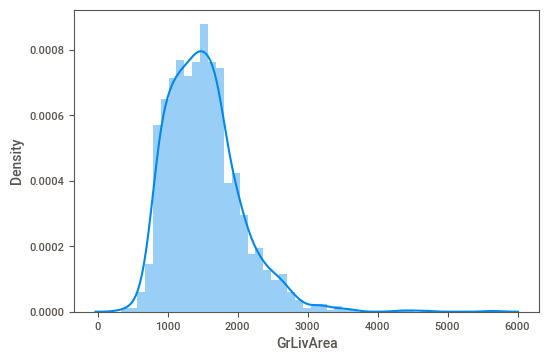

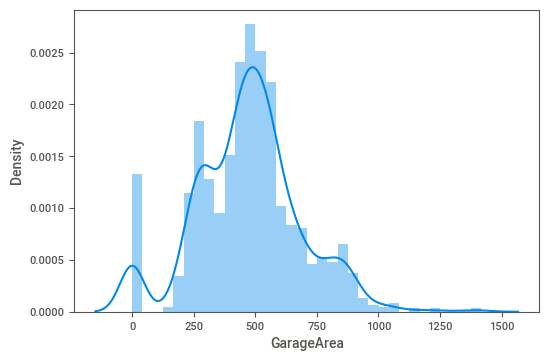

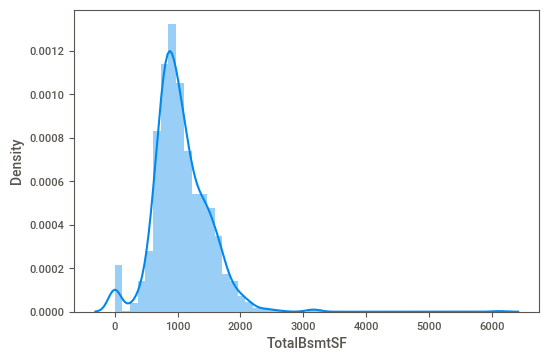

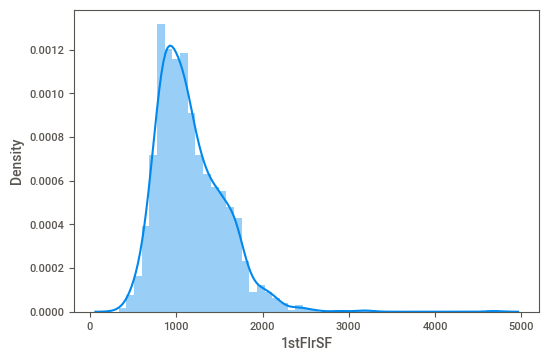

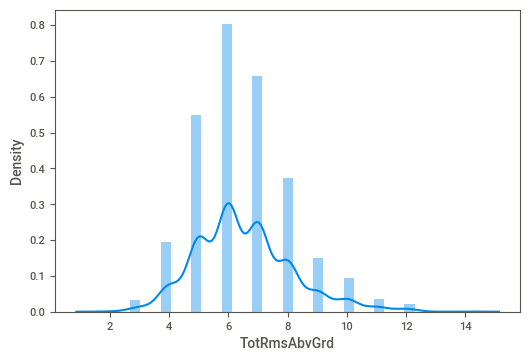

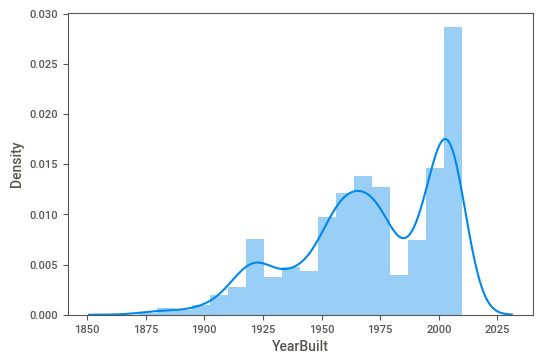

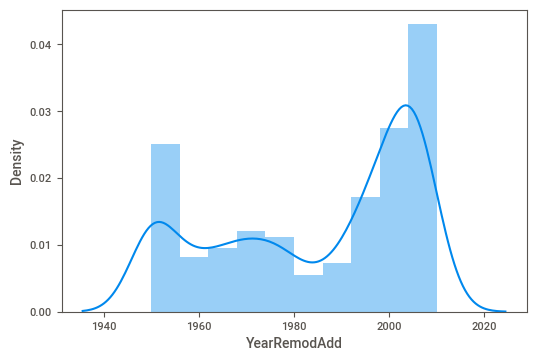

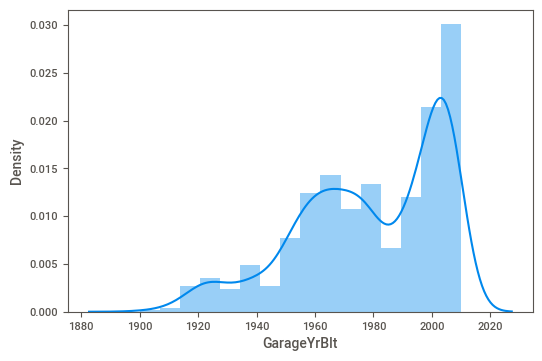

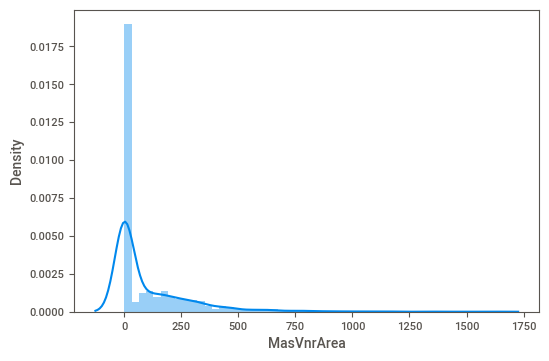

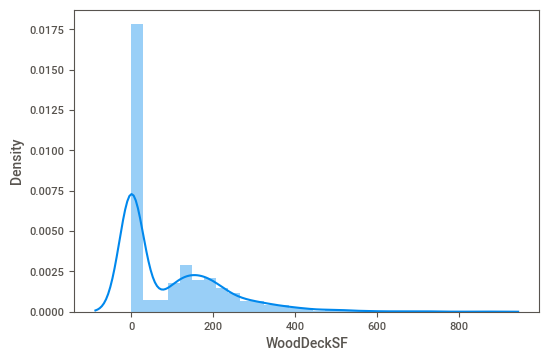

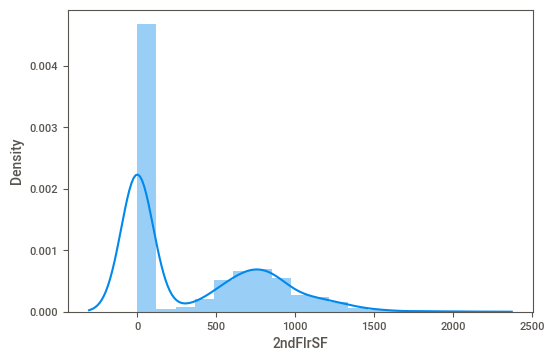

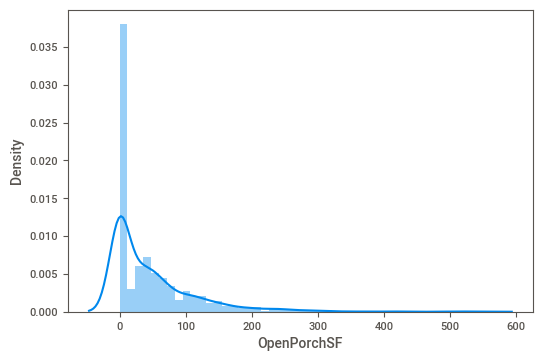

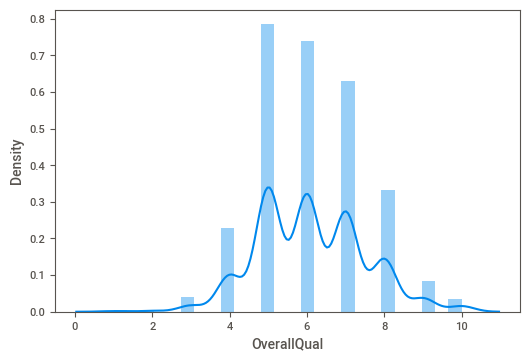

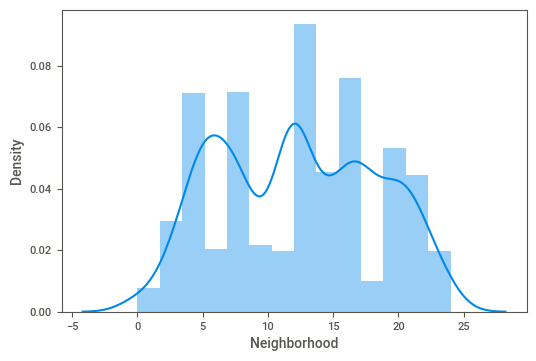

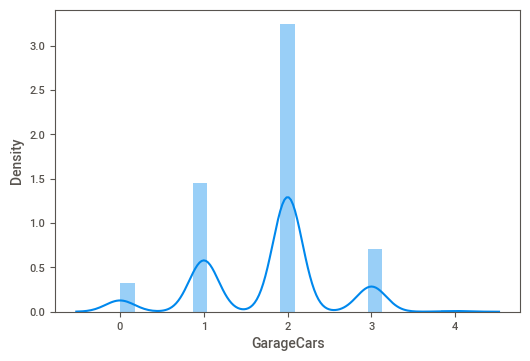

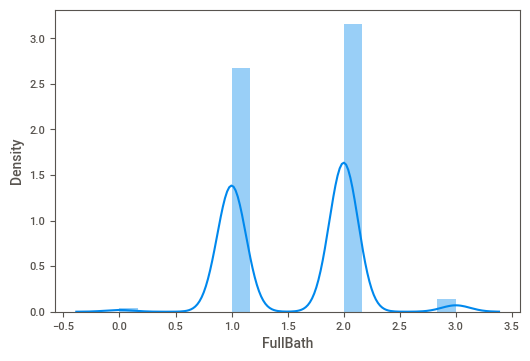

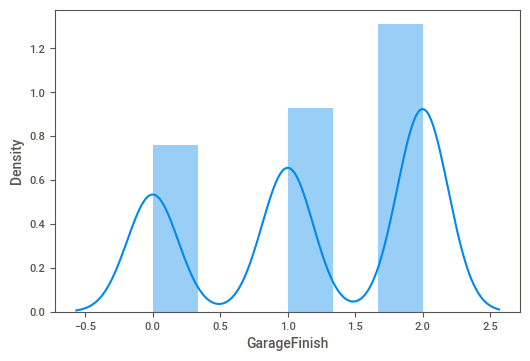

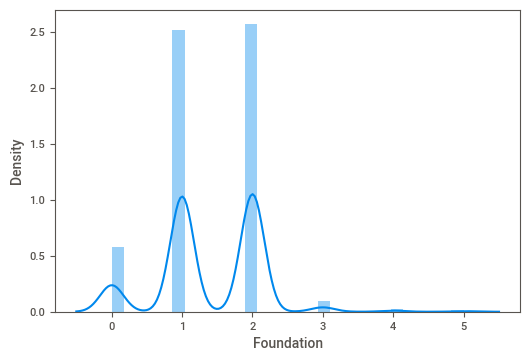

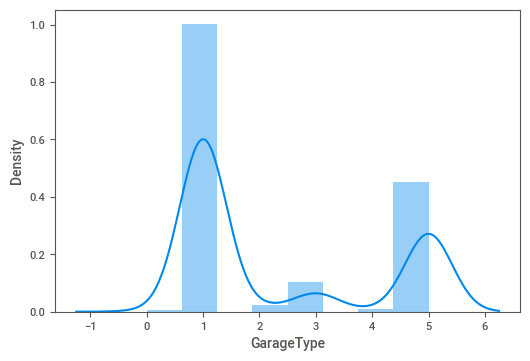

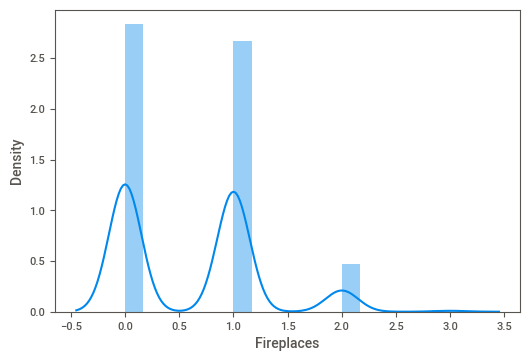

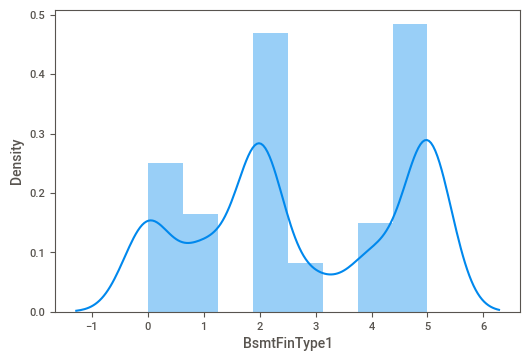

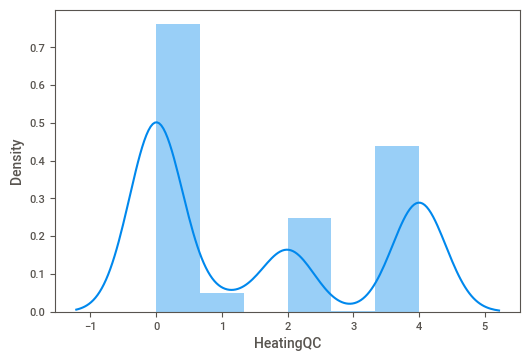

In [181]:
for i in x:
    plt.subplots()
    sns.distplot(x[i])

### Get the non Categorical Variables
* GrLivArea
* GarageArea
* TotalBsmtSF
* 1stFlrSF
* MasVnrArea
* WoodDeckSF
* 2ndFlrSF
* OpenPorchSF

**These attributes are not properly distributed So it is recommended to normalize them**

In [136]:
c=0
for i in df.SalePrice:
    c+=1
    if i ==0:
        
        break

In [137]:
print(c)

1442


<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

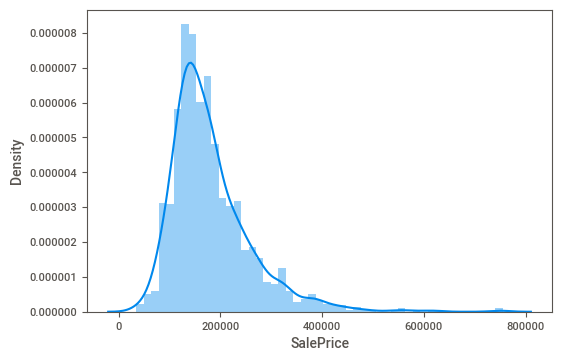

In [170]:
sns.distplot(dff.SalePrice)

In [173]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [182]:
transformers = ['GrLivArea',
'GarageArea',
'TotalBsmtSF',
'1stFlrSF',
'MasVnrArea',
'WoodDeckSF',
'2ndFlrSF',
'OpenPorchSF']

In [183]:
transformers

['GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'MasVnrArea',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF']

In [185]:
for i in transformers:
    x[[i]] = mm.fit_transform(x[[i]])

<ipython-input-185-488bf546af69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[[i]] = mm.fit_transform(x[[i]])
<ipython-input-185-488bf546af69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[[i]] = mm.fit_transform(x[[i]])
<ipython-input-185-488bf546af69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [186]:
x

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,WoodDeckSF,...,OverallQual,Neighborhood,GarageCars,FullBath,GarageFinish,Foundation,GarageType,Fireplaces,BsmtFinType1,HeatingQC
0,0.259231,0.386460,0.140098,0.119780,8,2003,2003,2003.0,0.122500,0.000000,...,7,5.0,2,2,1.0,2.0,1.0,0,2.0,0.0
1,0.174830,0.324401,0.206547,0.212942,6,1976,1976,1976.0,0.000000,0.347725,...,6,24.0,2,2,1.0,1.0,1.0,1,0.0,0.0
2,0.273549,0.428773,0.150573,0.134465,6,2001,2002,2001.0,0.101250,0.000000,...,7,5.0,2,2,1.0,2.0,1.0,1,2.0,0.0
3,0.260550,0.452750,0.123732,0.143873,7,1915,1970,1998.0,0.000000,0.000000,...,7,6.0,3,1,2.0,0.0,5.0,1,0.0,2.0
4,0.351168,0.589563,0.187398,0.186095,9,2000,2000,2000.0,0.218750,0.224037,...,8,15.0,3,2,1.0,2.0,1.0,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.247362,0.324401,0.155974,0.142038,7,1999,2000,1999.0,0.000000,0.000000,...,6,8.0,2,2,1.0,2.0,1.0,1,5.0,0.0
1456,0.327619,0.352609,0.252373,0.399036,7,1978,1988,1978.0,0.074375,0.407235,...,6,14.0,2,2,2.0,1.0,1.0,2,0.0,4.0
1457,0.377920,0.177715,0.188543,0.195961,9,1941,2006,1941.0,0.000000,0.000000,...,7,6.0,1,2,1.0,4.0,1.0,2,2.0,0.0
1458,0.140166,0.169252,0.176432,0.170721,5,1950,1996,1950.0,0.000000,0.427071,...,5,12.0,1,1,2.0,1.0,1.0,0,2.0,2.0


In [187]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(x,y)

In [188]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(trainx,trainy)

RandomForestRegressor()

In [189]:
yp = rf.predict(testx)

In [190]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(testy,yp)

0.8306849725448853

In [200]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()



In [201]:
lr.fit(trainx,trainy)

RANSACRegressor()

In [202]:
yplr = lr.predict(testx)

In [203]:
r2_score(testy,yplr)

0.6827276130232827

In [196]:
import xgboost
xg = xgboost.XGBRegressor()

In [197]:
xg.fit(trainx,trainy)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [198]:
ypxg = xg.predict(testx)

In [199]:
r2_score(testy,ypxg)

0.8405821646827516

In [207]:
ypgr = Gr.predict(testx)

In [208]:
r2_score(testy,ypgr)

0.8617507374136686

In [209]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor()

In [210]:
reg.fit(trainx,testx,trainy,testy)

 49%|████████████████████████████████████████                                          | 20/41 [00:02<00:02,  9.33it/s]C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:05<00:00,  7.44it/s]


(                               Adjusted R-Squared  R-Squared      RMSE  \
 Model                                                                    
 GradientBoostingRegressor                    0.86       0.86  31652.65   
 ExtraTreesRegressor                          0.84       0.85  33177.62   
 XGBRegressor                                 0.83       0.84  34358.61   
 BaggingRegressor                             0.83       0.84  34576.12   
 LGBMRegressor                                0.82       0.83  35108.65   
 HistGradientBoostingRegressor                0.82       0.83  35134.09   
 RandomForestRegressor                        0.82       0.83  35232.14   
 AdaBoostRegressor                            0.77       0.79  39828.17   
 KNeighborsRegressor                          0.74       0.75  42698.61   
 ExtraTreeRegressor                           0.72       0.74  44276.29   
 ElasticNet                                   0.68       0.70  47173.96   
 LarsCV                  

In [215]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1439 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [221]:
dff.fillna(method='bfill',inplace=True)

In [222]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [226]:
cats = []
for i in dff:
    if dff[i].dtype == 'object':
        cats.append(i)

In [227]:
cats

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [229]:
for i in cats:
    dff[[i]] = OrdinalEncoder().fit_transform(dff[[i]])

In [230]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   float64
 6   Alley          1460 non-null   float64
 7   LotShape       1460 non-null   float64
 8   LandContour    1460 non-null   float64
 9   Utilities      1460 non-null   float64
 10  LotConfig      1460 non-null   float64
 11  LandSlope      1460 non-null   float64
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   float64
 14  Condition2     1460 non-null   float64
 15  BldgType       1460 non-null   float64
 16  HouseStyle     1460 non-null   float64
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [246]:
tx = dff.drop(['SalePrice','Id'],axis=1)

In [247]:
tx

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.24,0.75,0.15,0.03,1.00,0.00,1.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.67,0.67,0.00,0.09,0.50,1.00,0.80
1,0.00,0.75,0.20,0.04,1.00,0.00,1.00,1.00,0.00,0.50,...,0.00,0.00,0.00,0.67,0.67,0.00,0.36,0.25,1.00,0.80
2,0.24,0.75,0.16,0.05,1.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.67,0.67,0.00,0.73,0.50,1.00,0.80
3,0.29,0.75,0.13,0.04,1.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.67,0.67,0.00,0.09,0.00,1.00,0.00
4,0.24,0.75,0.22,0.06,1.00,0.00,0.00,1.00,0.00,0.50,...,0.00,0.00,0.00,0.67,0.67,0.00,1.00,0.50,1.00,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.24,0.75,0.14,0.03,1.00,1.00,1.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.33,1.00,0.00,0.64,0.25,1.00,0.80
1456,0.00,0.75,0.22,0.06,1.00,1.00,1.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.67,1.00,0.00,0.09,1.00,1.00,0.80
1457,0.29,0.75,0.15,0.04,1.00,1.00,1.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.00,0.67,0.16,0.36,1.00,1.00,0.80
1458,0.00,0.75,0.16,0.04,1.00,1.00,1.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.00,0.67,0.00,0.27,1.00,1.00,0.80


In [251]:
ty = dff.SalePrice

In [245]:
for i in tx:
    dff[[i]] = mm.fit_transform(dff[[i]])

In [254]:
dff[['SalePrice']] = mm.fit_transform(dff[['SalePrice']])

In [255]:
trx,tstx,tr_y,tst_y = train_test_split(tx,ty)

In [257]:
reg.fit(trx,tstx,tr_y,tst_y)

  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 37%|██████████████████████████████                                                    | 15/41 [00:04<00:09,  2.82it/s]C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 75 iterations, i.e. alpha=4.284e-06, with an active set of 72 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 78 iterations, i.e. alpha=1.659e-06, with an active set of 75 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\linear_model\_le

C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=1.384e-05, with an active set of 74 regressors, and the smallest cholesky pivot element being 6.409e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=1.181e-05, with an active set of 74 regressors, and the smallest cholesky pivot element being 6.409e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 86 iterations, i

 54%|████████████████████████████████████████████                                      | 22/41 [00:05<00:03,  6.18it/s]C:\Users\sriharsha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:08<00:00,  4.59it/s]


(                                         Adjusted R-Squared  \
 Model                                                         
 HuberRegressor                                         0.87   
 ExtraTreesRegressor                                    0.85   
 LGBMRegressor                                          0.84   
 GradientBoostingRegressor                              0.84   
 BayesianRidge                                          0.83   
 XGBRegressor                                           0.83   
 HistGradientBoostingRegressor                          0.83   
 RandomForestRegressor                                  0.83   
 RidgeCV                                                0.83   
 Ridge                                                  0.83   
 TransformedTargetRegressor                             0.83   
 LinearRegression                                       0.83   
 LinearSVR                                              0.82   
 TweedieRegressor                       

# Comparision of Ridge and RMSE

* Model                                             | R-Squared        |    RMSE  
* ---------------------------------------------------------------------------------                                       
Ridge                                       |           0.87       |     0.04   
* ---------------------------------------------------------------------------------
Lasso                                       |         -0.00        |    0.11   